In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset

In [2]:
df = pd.read_csv("D:\Datasets\Data Analysis Training\sales_data_sample.csv" , encoding='latin1')

df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [3]:
#change column name to lowercase
df.columns = df.columns.str.lower()

print(df.columns)

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'phone',
       'addressline1', 'addressline2', 'city', 'state', 'postalcode',
       'country', 'territory', 'contactlastname', 'contactfirstname',
       'dealsize'],
      dtype='object')


In [4]:
#check null values
df.isnull().sum()

ordernumber            0
quantityordered        0
priceeach              0
orderlinenumber        0
sales                  0
orderdate              0
status                 0
qtr_id                 0
month_id               0
year_id                0
productline            0
msrp                   0
productcode            0
customername           0
phone                  0
addressline1           0
addressline2        2521
city                   0
state               1486
postalcode            76
country                0
territory           1074
contactlastname        0
contactfirstname       0
dealsize               0
dtype: int64

In [5]:
#list of columns to be dropped
columns_to_drop = ['addressline2', 'territory', 'state', 'city', 'orderdate', 'contactlastname','contactfirstname',
                   'postalcode', 'msrp' ,'qtr_id' , 'productcode', 'addressline1', 'phone']

df = df.drop(columns=columns_to_drop)

In [6]:
df.columns

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'status', 'month_id', 'year_id', 'productline', 'customername',
       'country', 'dealsize'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

ordernumber        0
quantityordered    0
priceeach          0
orderlinenumber    0
sales              0
status             0
month_id           0
year_id            0
productline        0
customername       0
country            0
dealsize           0
dtype: int64

In [9]:
df.dtypes

ordernumber          int64
quantityordered      int64
priceeach          float64
orderlinenumber      int64
sales              float64
status              object
month_id             int64
year_id              int64
productline         object
customername        object
country             object
dealsize            object
dtype: object

In [10]:
df.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,status,month_id,year_id,productline,customername,country,dealsize
0,10107,30,95.70,2,2871.00,Shipped,2,2003,Motorcycles,Land of Toys Inc.,USA,Small
1,10121,34,81.35,5,2765.90,Shipped,5,2003,Motorcycles,Reims Collectables,France,Small
2,10134,41,94.74,2,3884.34,Shipped,7,2003,Motorcycles,Lyon Souveniers,France,Medium
3,10145,45,83.26,6,3746.70,Shipped,8,2003,Motorcycles,Toys4GrownUps.com,USA,Medium
4,10159,49,100.00,14,5205.27,Shipped,10,2003,Motorcycles,Corporate Gift Ideas Co.,USA,Medium


In [11]:
df['status'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [12]:
df.replace({'Disputed':'notshipped',
            'In Process':'notshipped',
            'Cancelled':'notshipped',
            'On Hold':'notshipped',
            'Resolved':'notshipped'}, inplace=True)

df['status'].unique()

array(['Shipped', 'notshipped'], dtype=object)

## Visualizations 

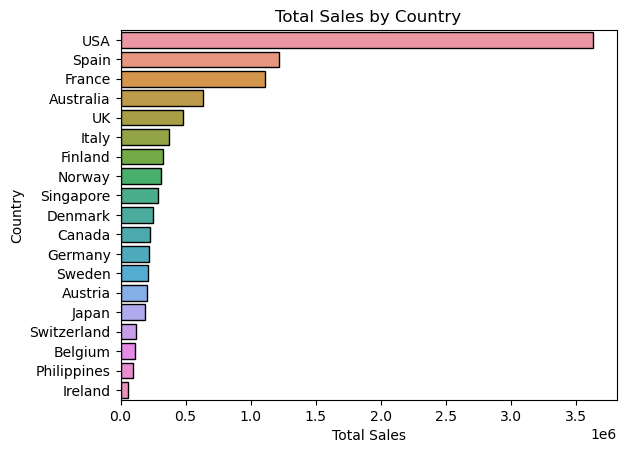

In [13]:
country_sales = df.groupby('country')['sales'].sum().reset_index()
country_sales_sorted = country_sales.sort_values(by='sales', ascending=False)

sns.barplot(y='country', x='sales', data=country_sales_sorted, edgecolor='black')
plt.title('Total Sales by Country')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

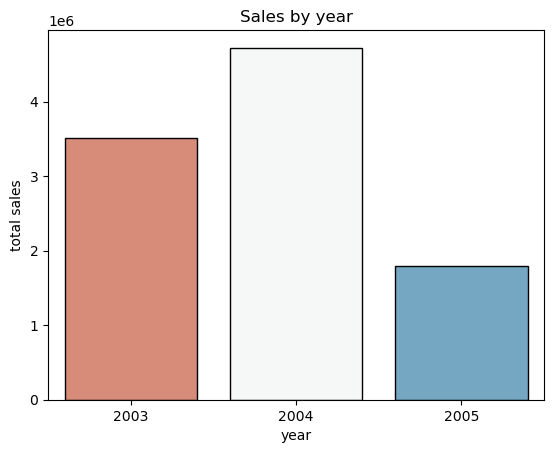

In [14]:
year_sales = df.groupby('year_id')['sales'].sum().reset_index()
year_sales_sorted = year_sales.sort_values(by='sales', ascending=False)

sns.barplot(y='sales', x='year_id', data=year_sales_sorted, edgecolor='black', palette='RdBu')
plt.title('Sales by year')
plt.xlabel('year')
plt.ylabel('total sales')
plt.show()

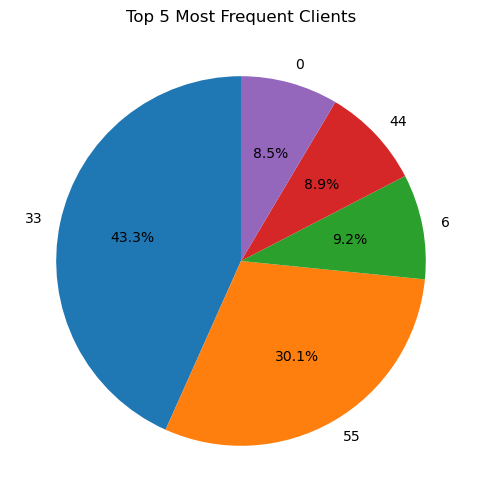

In [22]:
top_5_customers = df['customername'].value_counts().head(5)
# Plot using matplotlib
plt.figure(figsize=(10, 6))
top_5_customers.plot(kind='pie' ,autopct='%1.1f%%',startangle=90)
plt.ylabel('')
plt.title('Top 5 Most Frequent Clients')
plt.show()


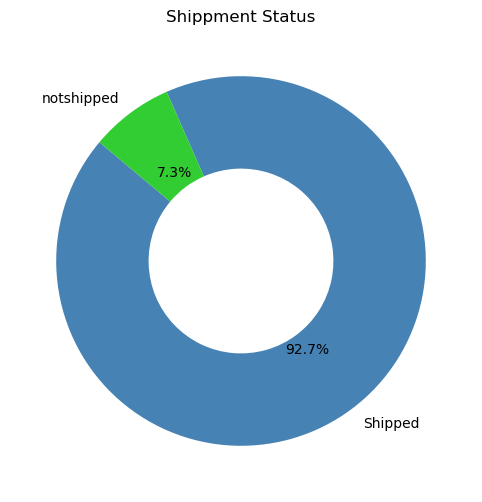

In [16]:
plt.figure(figsize=(10, 6))
colors = ['#4682b4','#32cd32']
df['status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors,  wedgeprops=dict(width=0.5))
plt.title('Shippment Status')
plt.ylabel('')
plt.show()

In [17]:
#upload dataset
df.to_csv('modified_retail_dataset.csv', index=False)

### Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['status'] = encoder.fit_transform(df['status'])
df['productline'] = encoder.fit_transform(df['productline'])
df['country'] = encoder.fit_transform(df['country'])
df['dealsize'] = encoder.fit_transform(df['dealsize'])
df['customername'] = encoder.fit_transform(df['customername'])

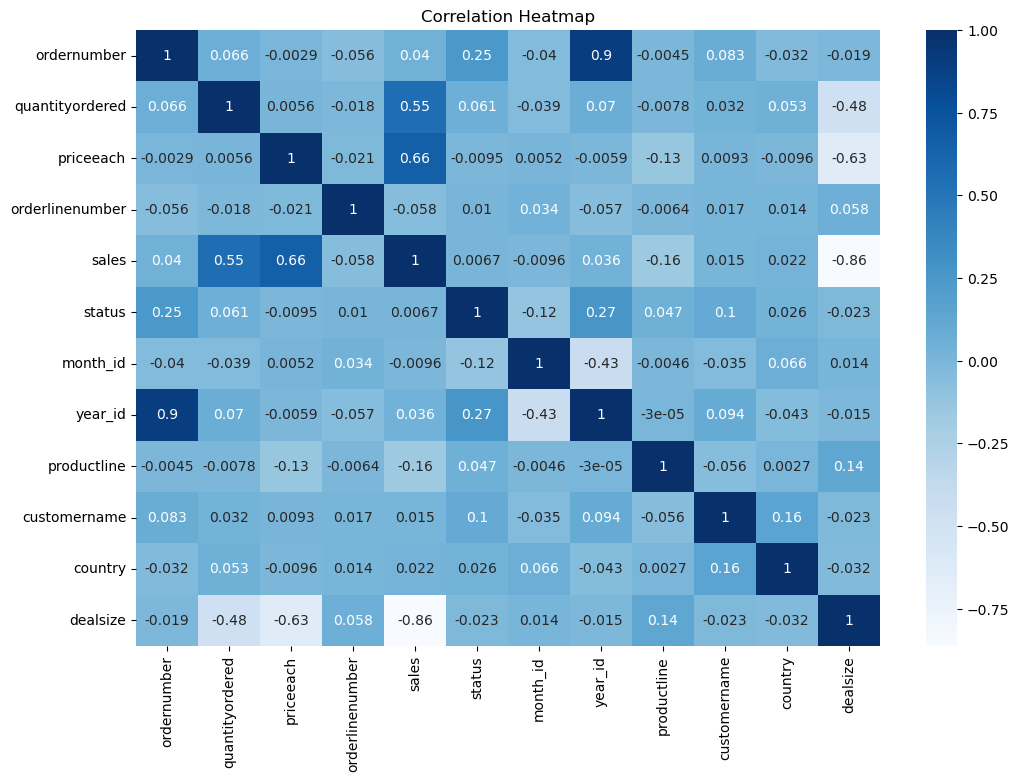

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='Blues', annot = True)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
df.dtypes

ordernumber          int64
quantityordered      int64
priceeach          float64
orderlinenumber      int64
sales              float64
status               int32
month_id             int64
year_id              int64
productline          int32
customername         int32
country              int32
dealsize             int32
dtype: object